In [ ]:
import pandas as pd

In [8]:
df=pd.read_csv("/content/luzina_personal_expense.csv")

In [ ]:
df.head(10)

,Date,Category,Amount,Description
0,2024-01-01,Rent,8000.00,Monthly room rent
1,2024-01-01,Travel,429.49,Travel expense
2,2024-01-03,Electricity,1200.00,Electricity bill
3,2024-01-03,Snacks,200.72,Snacks expense
4,2024-01-04,Snacks,149.13,Snacks expense
5,2024-01-04,Recharge,249.00,Mobile recharge
6,2024-01-05,Stationery,188.84,Stationery expense
7,2024-01-05,Stationery,307.02,Stationery expense
8,2024-01-05,WiFi,699.00,Internet charges
9,2024-01-06,Dining Out,448.59,Dining Out expense


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M').astype(str)
df.dropna(inplace=True)

In [ ]:
monthly_totals = df.groupby('Month')['Amount'].sum().reset_index()
category_totals = df.groupby('Category')['Amount'].sum().reset_index()

total_spent = df['Amount'].sum()
top_category = category_totals.sort_values(by='Amount', ascending=False).iloc[0]['Category']

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print(df.columns.tolist())


['Date', 'Category', 'Amount', 'Description']


In [ ]:
df.columns = df.columns.str.strip()


In [ ]:
df.columns.tolist()

['Date', 'Category', 'Amount', 'Description']

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

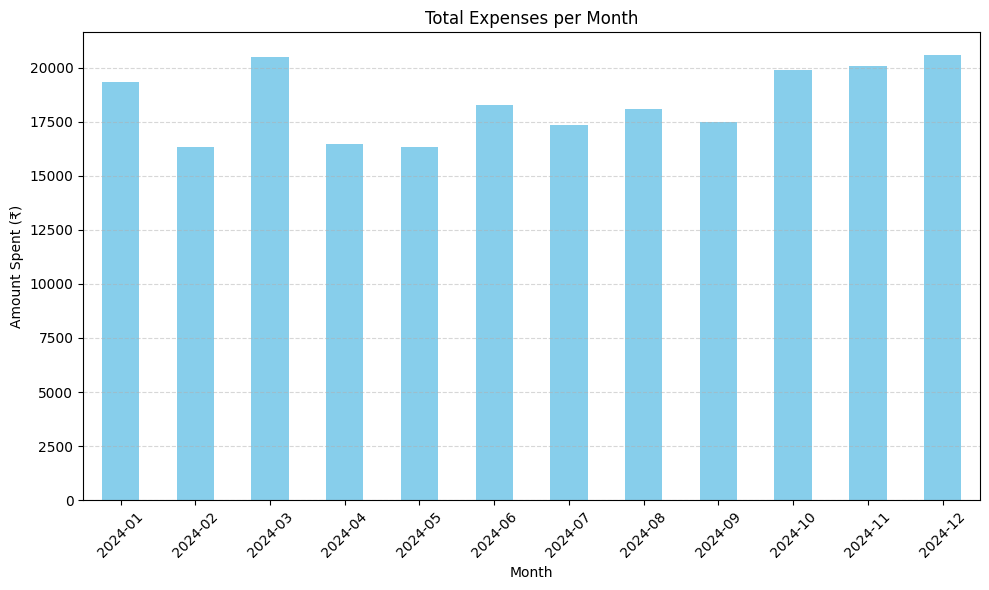

In [ ]:
df['Month'] = df['Date'].dt.to_period('M')

monthly_expenses = df.groupby('Month')['Amount'].sum()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
monthly_expenses.plot(kind='bar', color='skyblue')
plt.title("Total Expenses per Month")
plt.xlabel("Month")
plt.ylabel("Amount Spent (₹)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

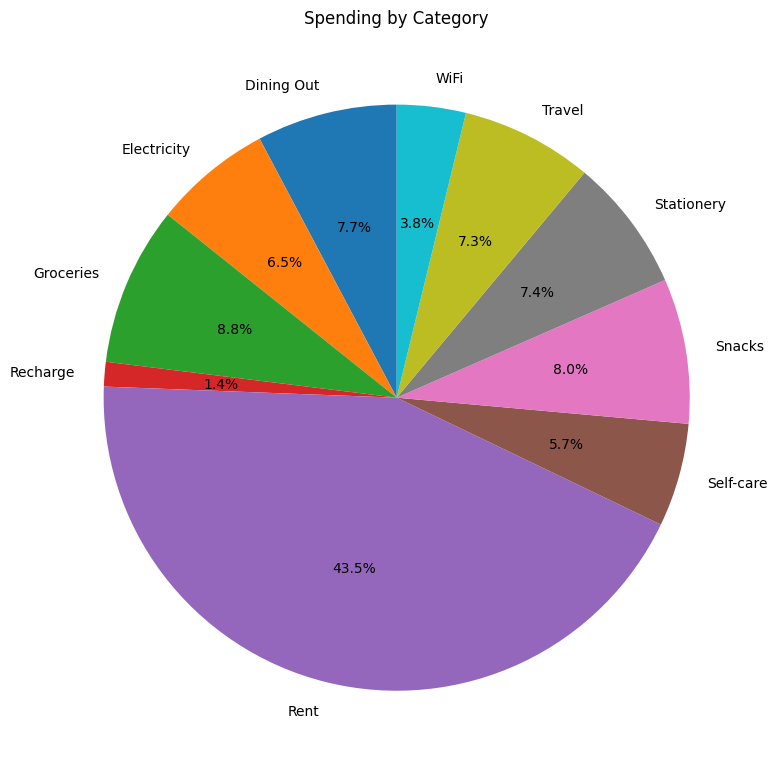

In [ ]:
category_expenses = df.groupby('Category')['Amount'].sum()

plt.figure(figsize=(8, 8))
category_expenses.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Spending by Category")
plt.ylabel("")
plt.tight_layout()
plt.show()

In [ ]:
total_spent = df['Amount'].sum()
top_category = category_expenses.idxmax()
top_amount = category_expenses.max()

print("Total Spent: ₹", total_spent)
print("Top Spending Category:", top_category, f"(₹{top_amount})")

Total Spent: ₹ 220810.21000000002
Top Spending Category: Rent (₹96000.0)


In [ ]:
top_expenses = df.sort_values(by='Amount', ascending=False)
top_expenses.head(10)

,Date,Category,Amount,Description,Month
0,2024-01-01,Rent,8000.0,Monthly room rent,2024-01
374,2024-12-01,Rent,8000.0,Monthly room rent,2024-12
330,2024-11-01,Rent,8000.0,Monthly room rent,2024-11
40,2024-02-01,Rent,8000.0,Monthly room rent,2024-02
64,2024-03-01,Rent,8000.0,Monthly room rent,2024-03
260,2024-09-01,Rent,8000.0,Monthly room rent,2024-09
291,2024-10-01,Rent,8000.0,Monthly room rent,2024-10
195,2024-07-01,Rent,8000.0,Monthly room rent,2024-07
100,2024-04-01,Rent,8000.0,Monthly room rent,2024-04
166,2024-06-01,Rent,8000.0,Monthly room rent,2024-06


In [12]:
df.to_csv("cleaned_expense_data.csv", index=False)

In [11]:
from google.colab import files

In [13]:
files.download("cleaned_expense_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>